# 국가(대륙)별/ 상품군별 온라인쇼핑 해외 직접 판매액 
* 국가통계포털(Kosis)  
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

# 가설수립 
**K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?**  
* k-Beauty란? https://en.wikipedia.org/wiki/K-Beauty  
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

# 필요 라이브러리 가져오기 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# 주피터 노트북 내에서 그래프를 볼 수 있는 옵션
%matplotlib inline 


In [2]:
# 시각화를 위한 폰트설정 
# os 별로 폰트를 다르게 지정합니다. 
import os

#os.name
if os.name == "posix":
    sns.set(font = "AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다. 
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다. 
%config InlineBackend.figure_format = 'retina'

# 데이터 로드하기 


In [4]:
# 일단 다운로드 폴더에 있는 csv 파일을  이 디렉토리로 옮긴다. 

# 지금 파일이 있는 경로 
# %pwd  # --> C:\\Users\\wnsgn\\Desktop\\pro\\Jupyter_tutorials

# 파일 옮기기 (다운로드 파일의 경로는  ~/do 를 통한 단축키 사용)
# !move "C:/\Users/\wnsgn/\Downloads/\국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210130152648.csv" "C:\\Users\\wnsgn\\Desktop\\pro\\Jupyter_tutorials\\data\"
# 1개 파일을 이동했습니다. 

In [5]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210130152648.csv",
                    encoding="cp949")

df_raw.shape

(450, 27)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   450 non-null    object
 1   상품군별      450 non-null    object
 2   판매유형별     450 non-null    object
 3   2014 1/4  450 non-null    object
 4   2014 2/4  450 non-null    object
 5   2014 3/4  450 non-null    object
 6   2014 4/4  450 non-null    object
 7   2015 1/4  450 non-null    object
 8   2015 2/4  450 non-null    object
 9   2015 3/4  450 non-null    object
 10  2015 4/4  450 non-null    object
 11  2016 1/4  450 non-null    object
 12  2016 2/4  450 non-null    object
 13  2016 3/4  450 non-null    object
 14  2016 4/4  450 non-null    object
 15  2017 1/4  450 non-null    int64 
 16  2017 2/4  450 non-null    int64 
 17  2017 3/4  450 non-null    int64 
 18  2017 4/4  450 non-null    int64 
 19  2018 1/4  450 non-null    int64 
 20  2018 2/4  450 non-null    int64 
 21  2018 3/4  450 no

In [7]:
# "국가(대륙)별" 데이터 빈도수 세기 
df_raw["국가(대륙)별"].value_counts()

중남미           45
아세안(ASEAN)    45
대양주           45
중국            45
일본            45
중동            45
기타            45
미국            45
유럽연합(EU)      45
합계            45
Name: 국가(대륙)별, dtype: int64

In [8]:
# 미국만 데이터 따로 보기 
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1382
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


# 분석과 시각화를 위한 tidy data 만들기 

   ( tidy 깔끔한 )
* 데이터 분석을 위해 분석이 가능한 형태로 데이터를 사전 전처리 해줍니다.  
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* pandas에서 제공하는 melt 함수를 활용하여, 시계열을 행으로 갖도록 만들어줍니다. 

In [9]:
# 도움말 확인하기
df_raw.melt?

In [10]:
# df_raw.columns
df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


In [11]:
# variable 이라 표현된 항목과 value라 표현된 항목의 이름을 각각 기간과 백만원 이라 바꿔준다

df = df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
df.head(10)

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
5,합계,컴퓨터 및 주변기기,면세점 이외,2014 1/4,-
6,합계,가전·전자·통신기기,계,2014 1/4,13259
7,합계,가전·전자·통신기기,면세점,2014 1/4,-
8,합계,가전·전자·통신기기,면세점 이외,2014 1/4,-
9,합계,소프트웨어,계,2014 1/4,361


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 데이터 전처리 

## 기간에서 연도를 분리하기 

In [13]:
df["기간"] # object 형임을 알 수 있음 
type("2019 4/4".split()[0]) #str 데이터 타입임 

# 따라서, 데이터 타입을 int로 변환하기 위한 int() 함수를 사용하여 전환해준다. 
type(int("2019 4/4".split()[0]))

int

In [14]:
# df["기간"].map?
# 연도 분리하기 
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [15]:
# 기간에서 분기 분리하기 
# 분리 test 
int("2019 1/4".split()[1].split("/")[0])

df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기 

In [16]:
# - 문자를 결측치로 변경하고 float 데이터 타입으로 변경하기 
df["백만원"] = df["백만원"].replace("-",np.nan).astype(float) 
# nan이 float 타입으로 들어가기 때문에 int가 아닌 float 타입으로 지정해준다. 

df.head()

# df["백만원"].replace("-",pd.np.nan) # 수업에서는 numpy를 로드하지 않음, --> 판다스 내부에 있는 pd.np.nan 옵션을 이용하여 변경가능  

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기 

In [17]:
# 제거 이전의 데이터 모습을 자알 봐봐 
df
# 합계 데이터는 필요 없을것 같아 제거한다. 

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [19]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다. 
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [20]:
# 결측치 보기 
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화 

## 전체 상품군 판매액 

In [21]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에 
# 판매유형별 == "계" 인 데이터만 가져와서 봐야지 
#평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다. 
df_total = df[df["판매유형별"] == "계"].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


<AxesSubplot:xlabel='연도', ylabel='백만원'>

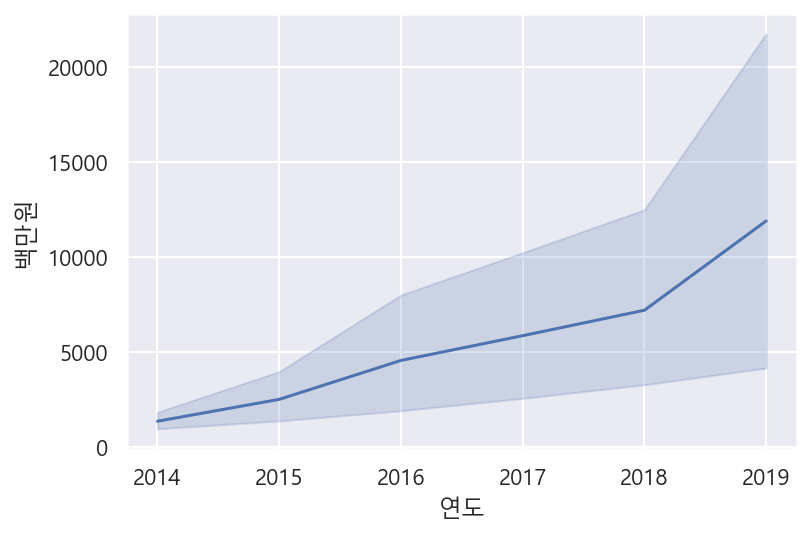

In [22]:
# 연도, 판매액 lineplot으로 그리기 
#df_total.plot.line() --> 판다스 제공 그래프 
sns.lineplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

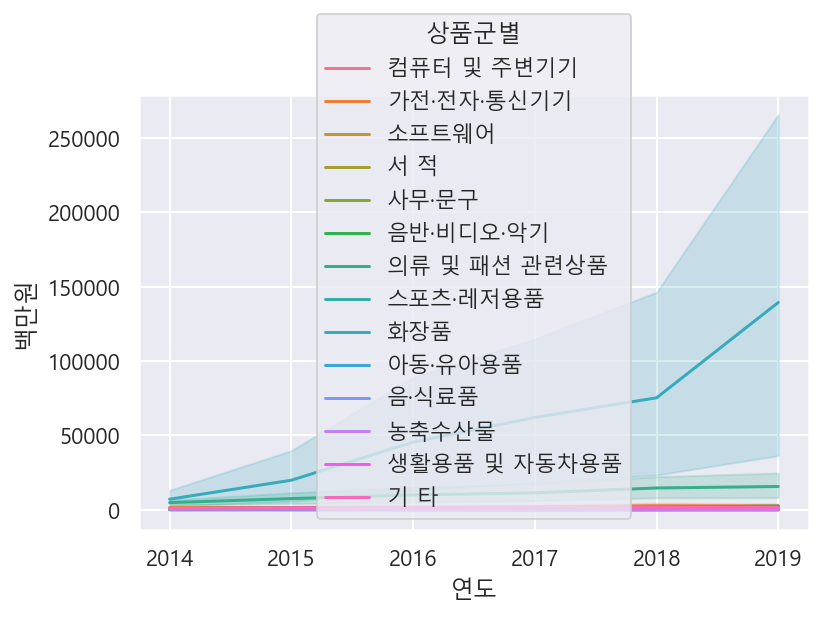

In [23]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기 

#plt.figure(figsize=(10,10))
sns.lineplot(data=df_total, x = "연도", y="백만원", hue="상품군별")

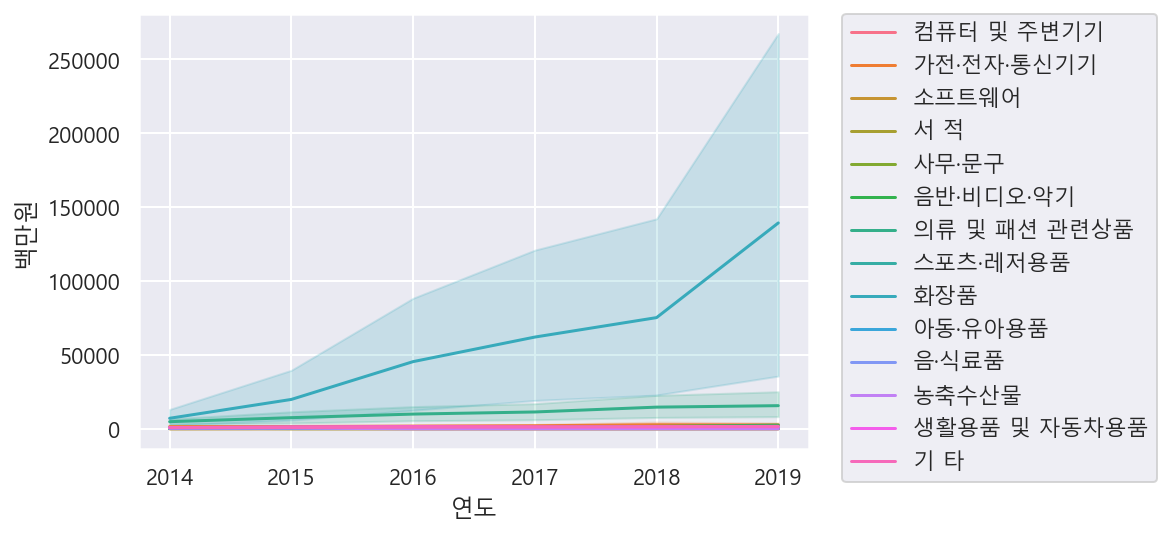

In [24]:
# 위의 경우 legend (범례(기호 설명표))가 차트를 가리고 중앙에 위치함을 볼 수 있다. 

# legend 차트 바깥에 표시하기 
    # https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
sns.lineplot(data=df_total, x = "연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad = 0.)

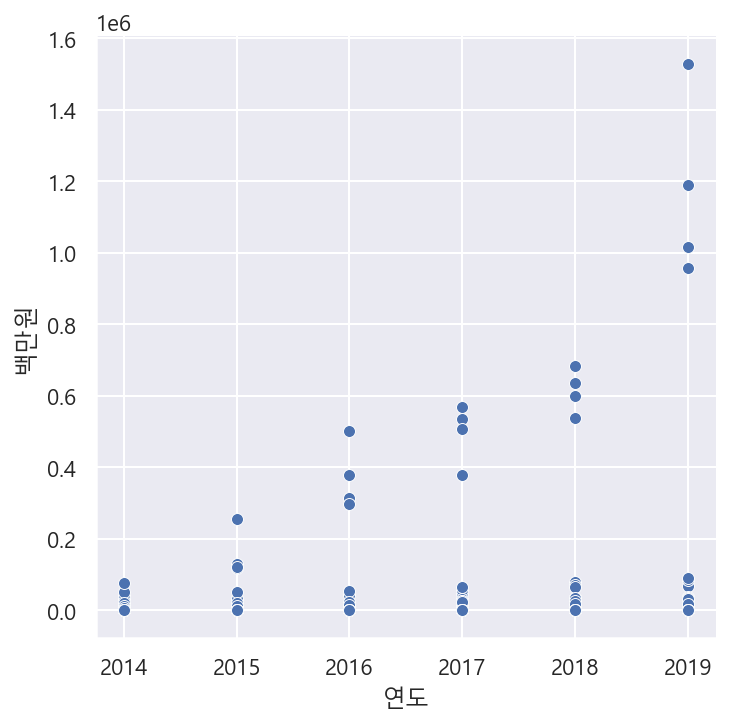

In [25]:
# 위의 차트에서 비중이 낮은 값들의 수치는 확인하기 어려움 
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기 

# seaborn에서는 relplot (릴플롯) 이라는 기능을 제공 
sns.relplot(data = df_total, x="연도", y = "백만원" )


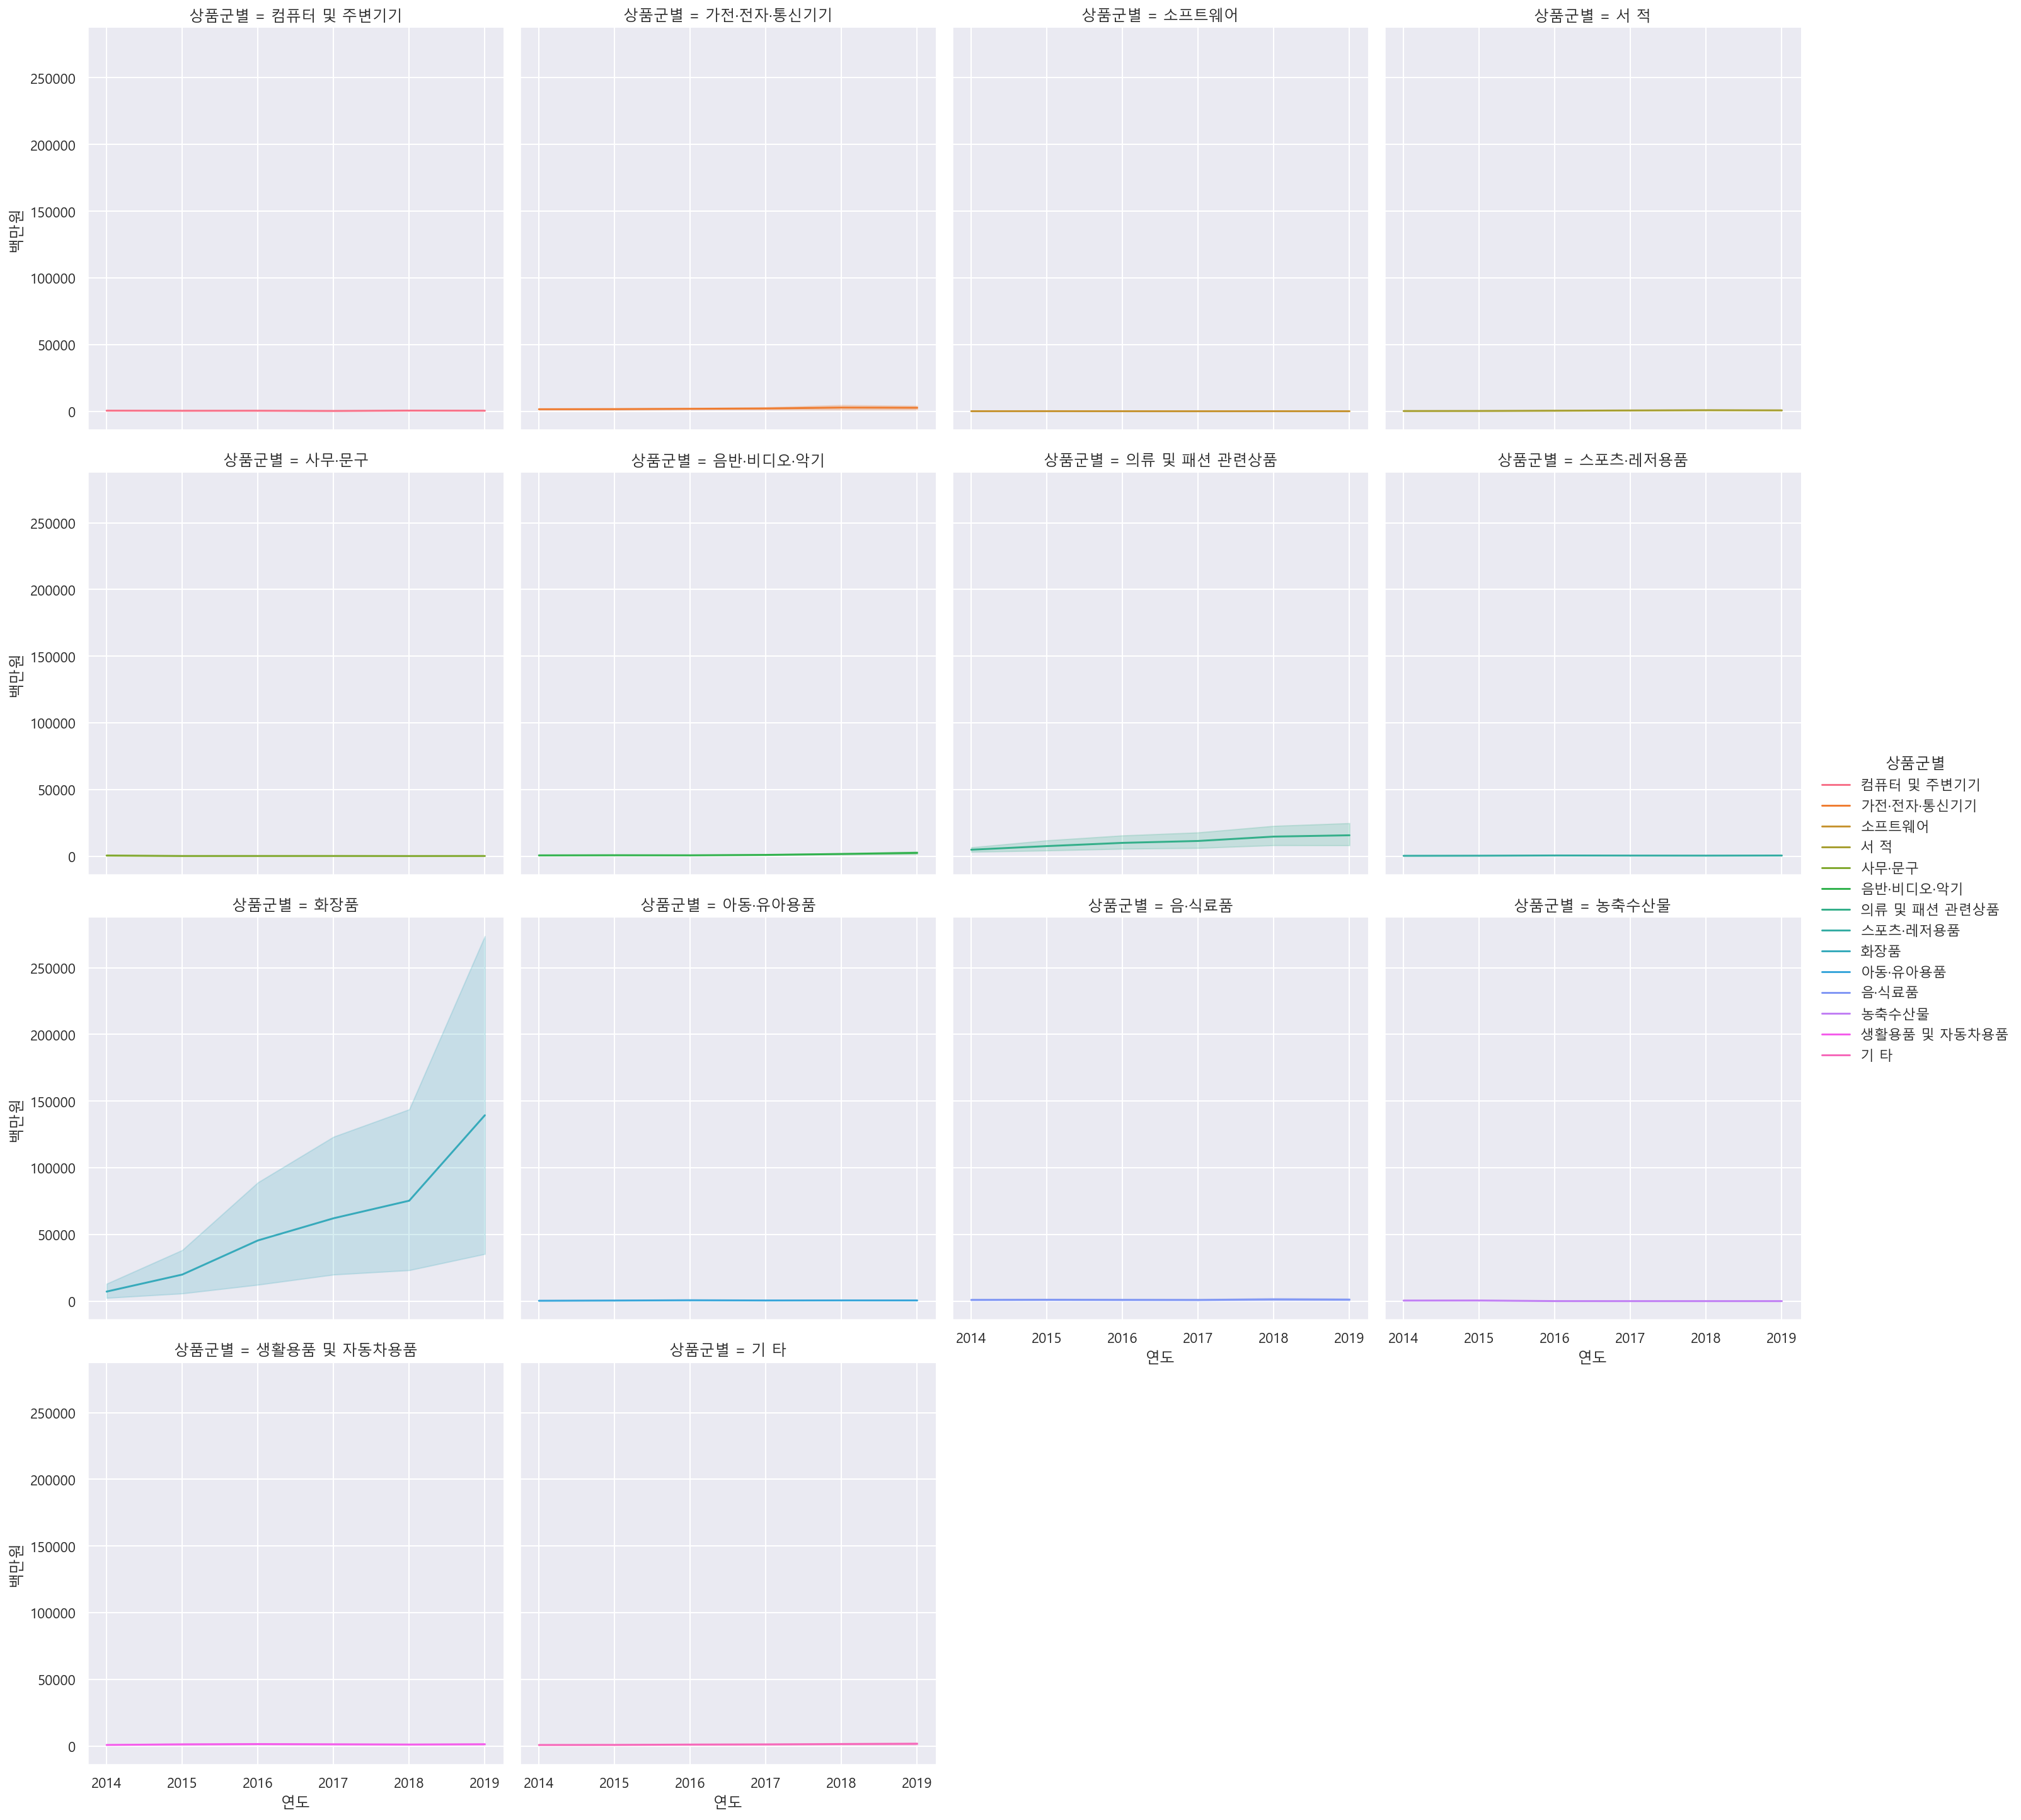

In [26]:
sns.relplot(data=df_total, x="연도",y="백만원",hue="상품군별",kind= "line", col="상품군별",col_wrap=4)
# hue만 넣으면 위의 그래프에서 색만 다르게 
# kind = line 지정시, 위의 lineplot과 같은 모습 

# col 옵션을 통해 열별로 다르게 지정할 수치들을 설정하고 
# col_weap 을 통해 한 열에 표현할 그래프 갯수를 지정 

In [27]:
# 하지만, 여전히 화장품이 넘사라 다른 값들의 증감이 안보임 
# 화장품을 제외한 변수를 설정해 나머지 값들의 증감을 보자 
# isin을 사용해 화장품만 제외를하고 df_sub 이란 변수에 담습니다. 

# df_total[df_total["상품군별"].isin(["화장품"])] --> 화장품만 담긴다 --> 부정은 ~(물결)
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy() 
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


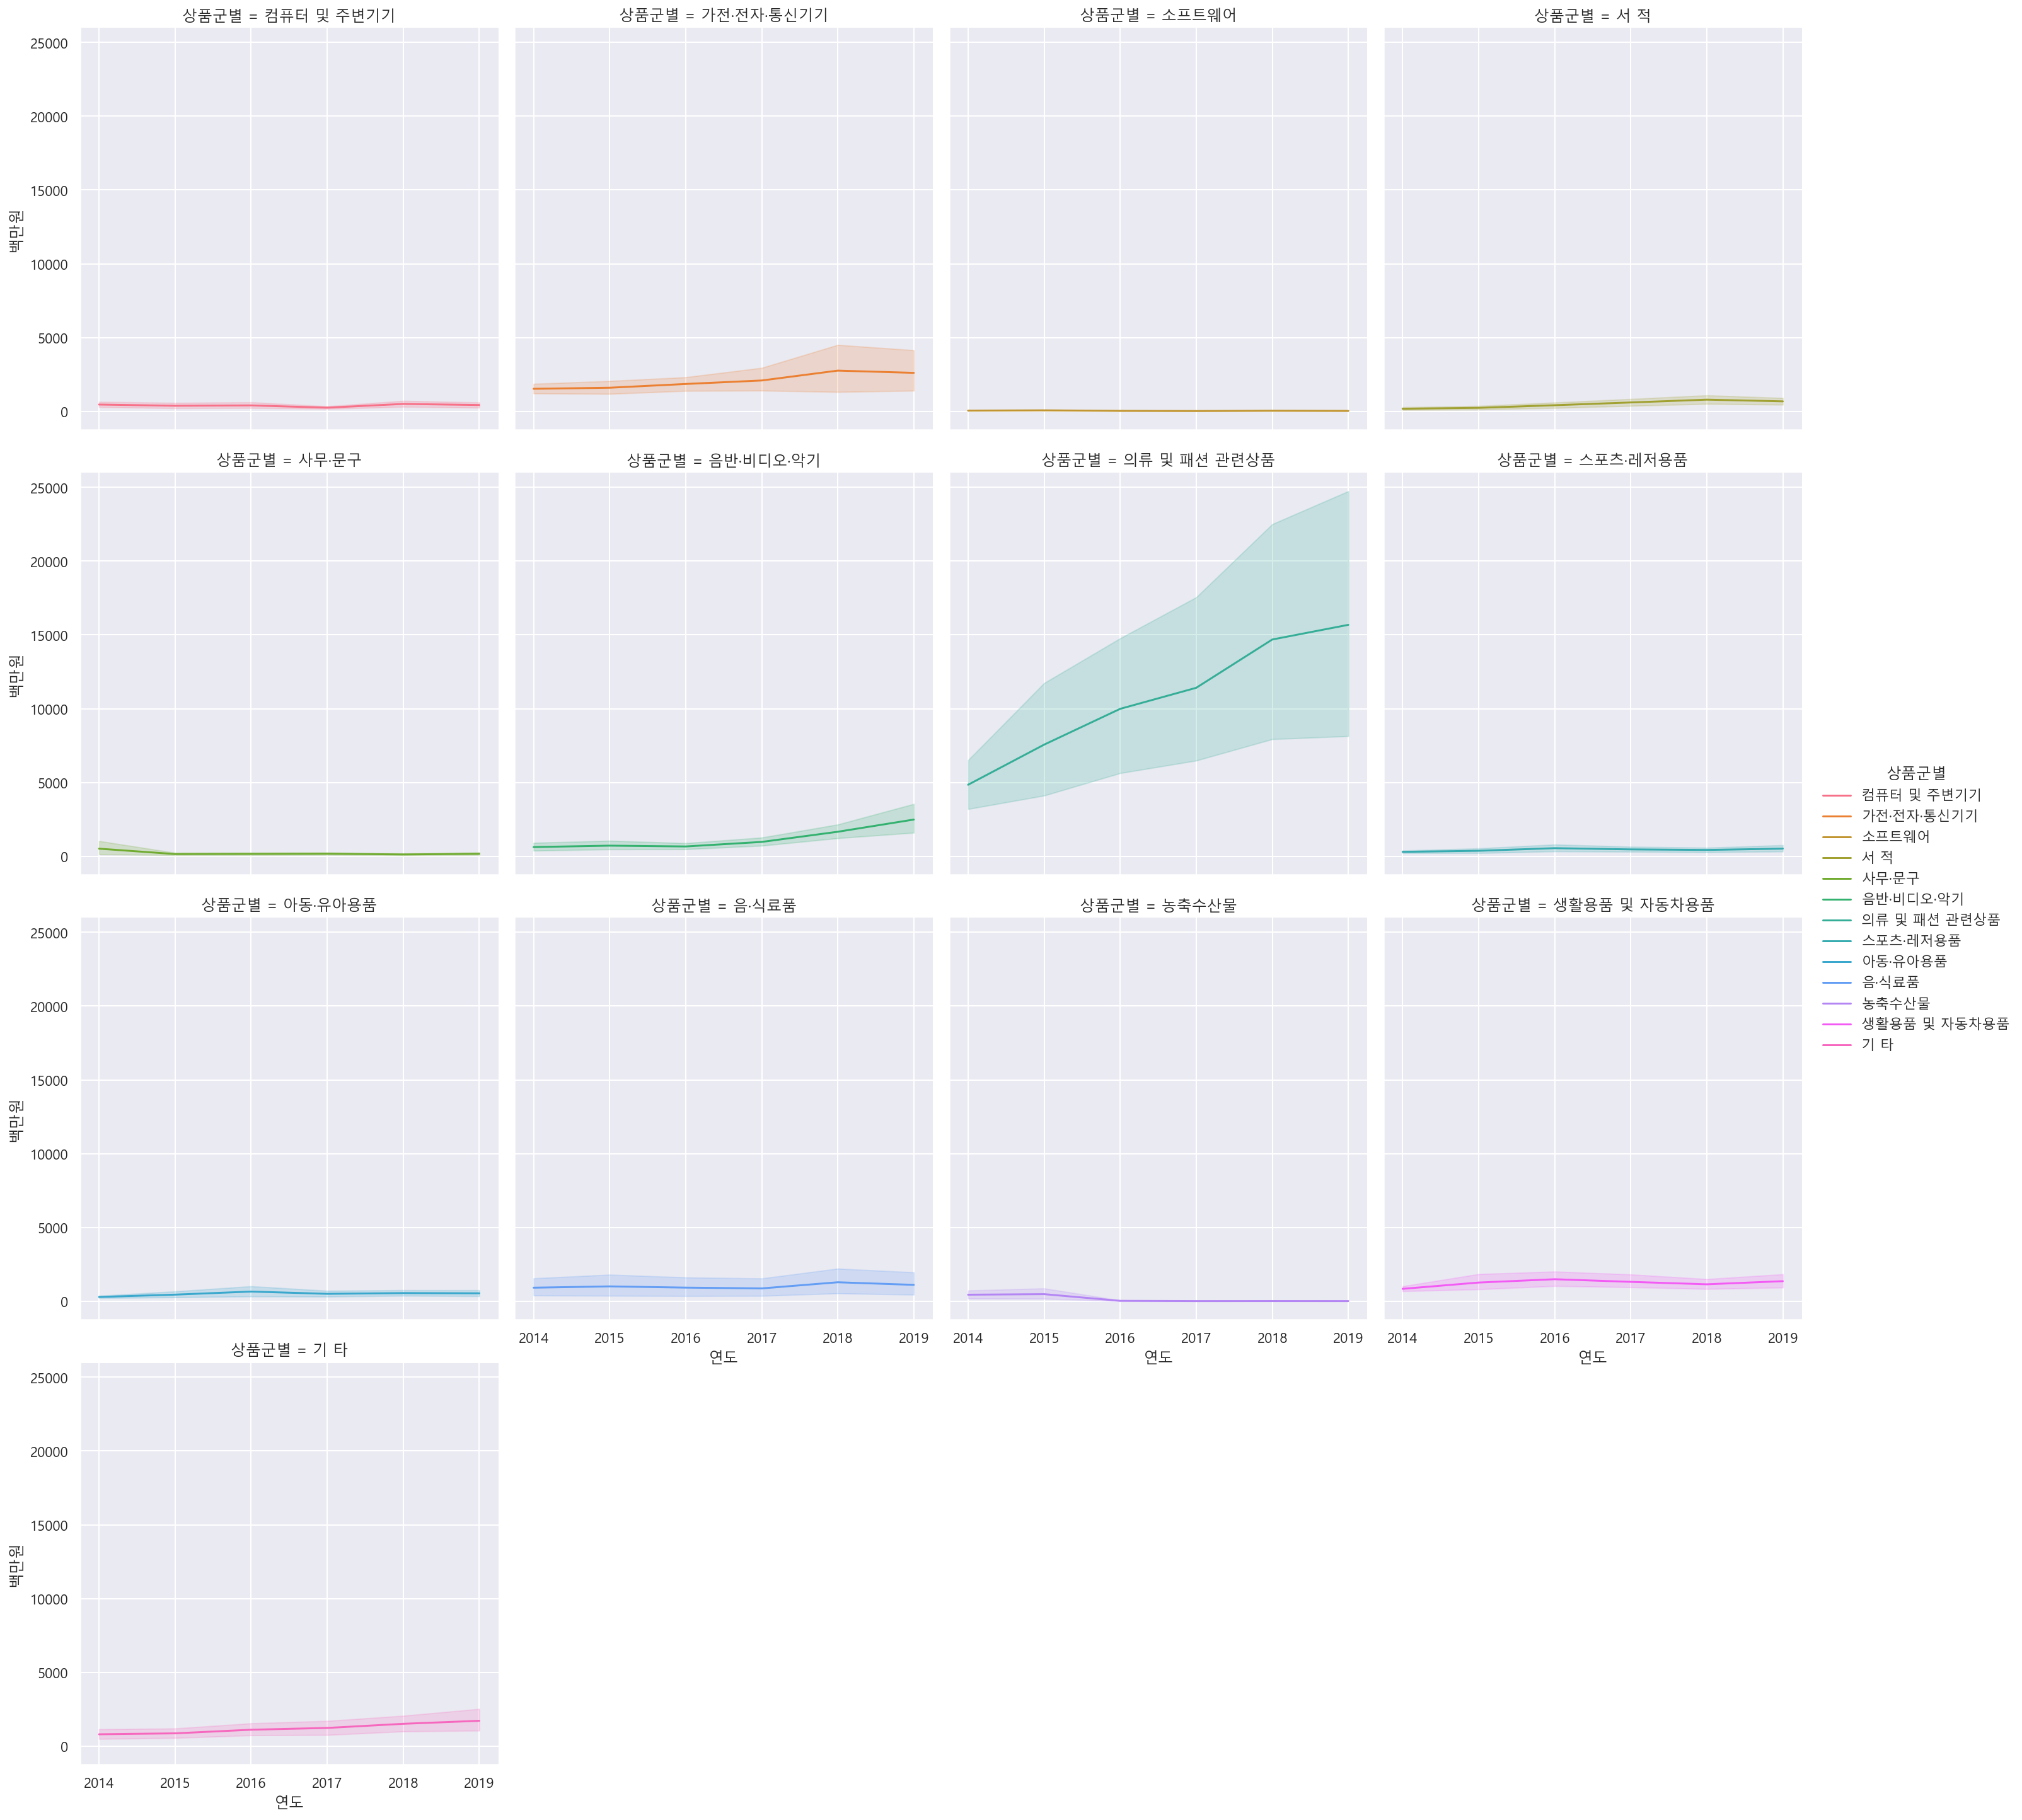

In [29]:
# 연도별 판매액을 상품군별로 replot을 활용해 서브플롯 그려보기 
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",kind="line",col="상품군별",col_wrap=4)

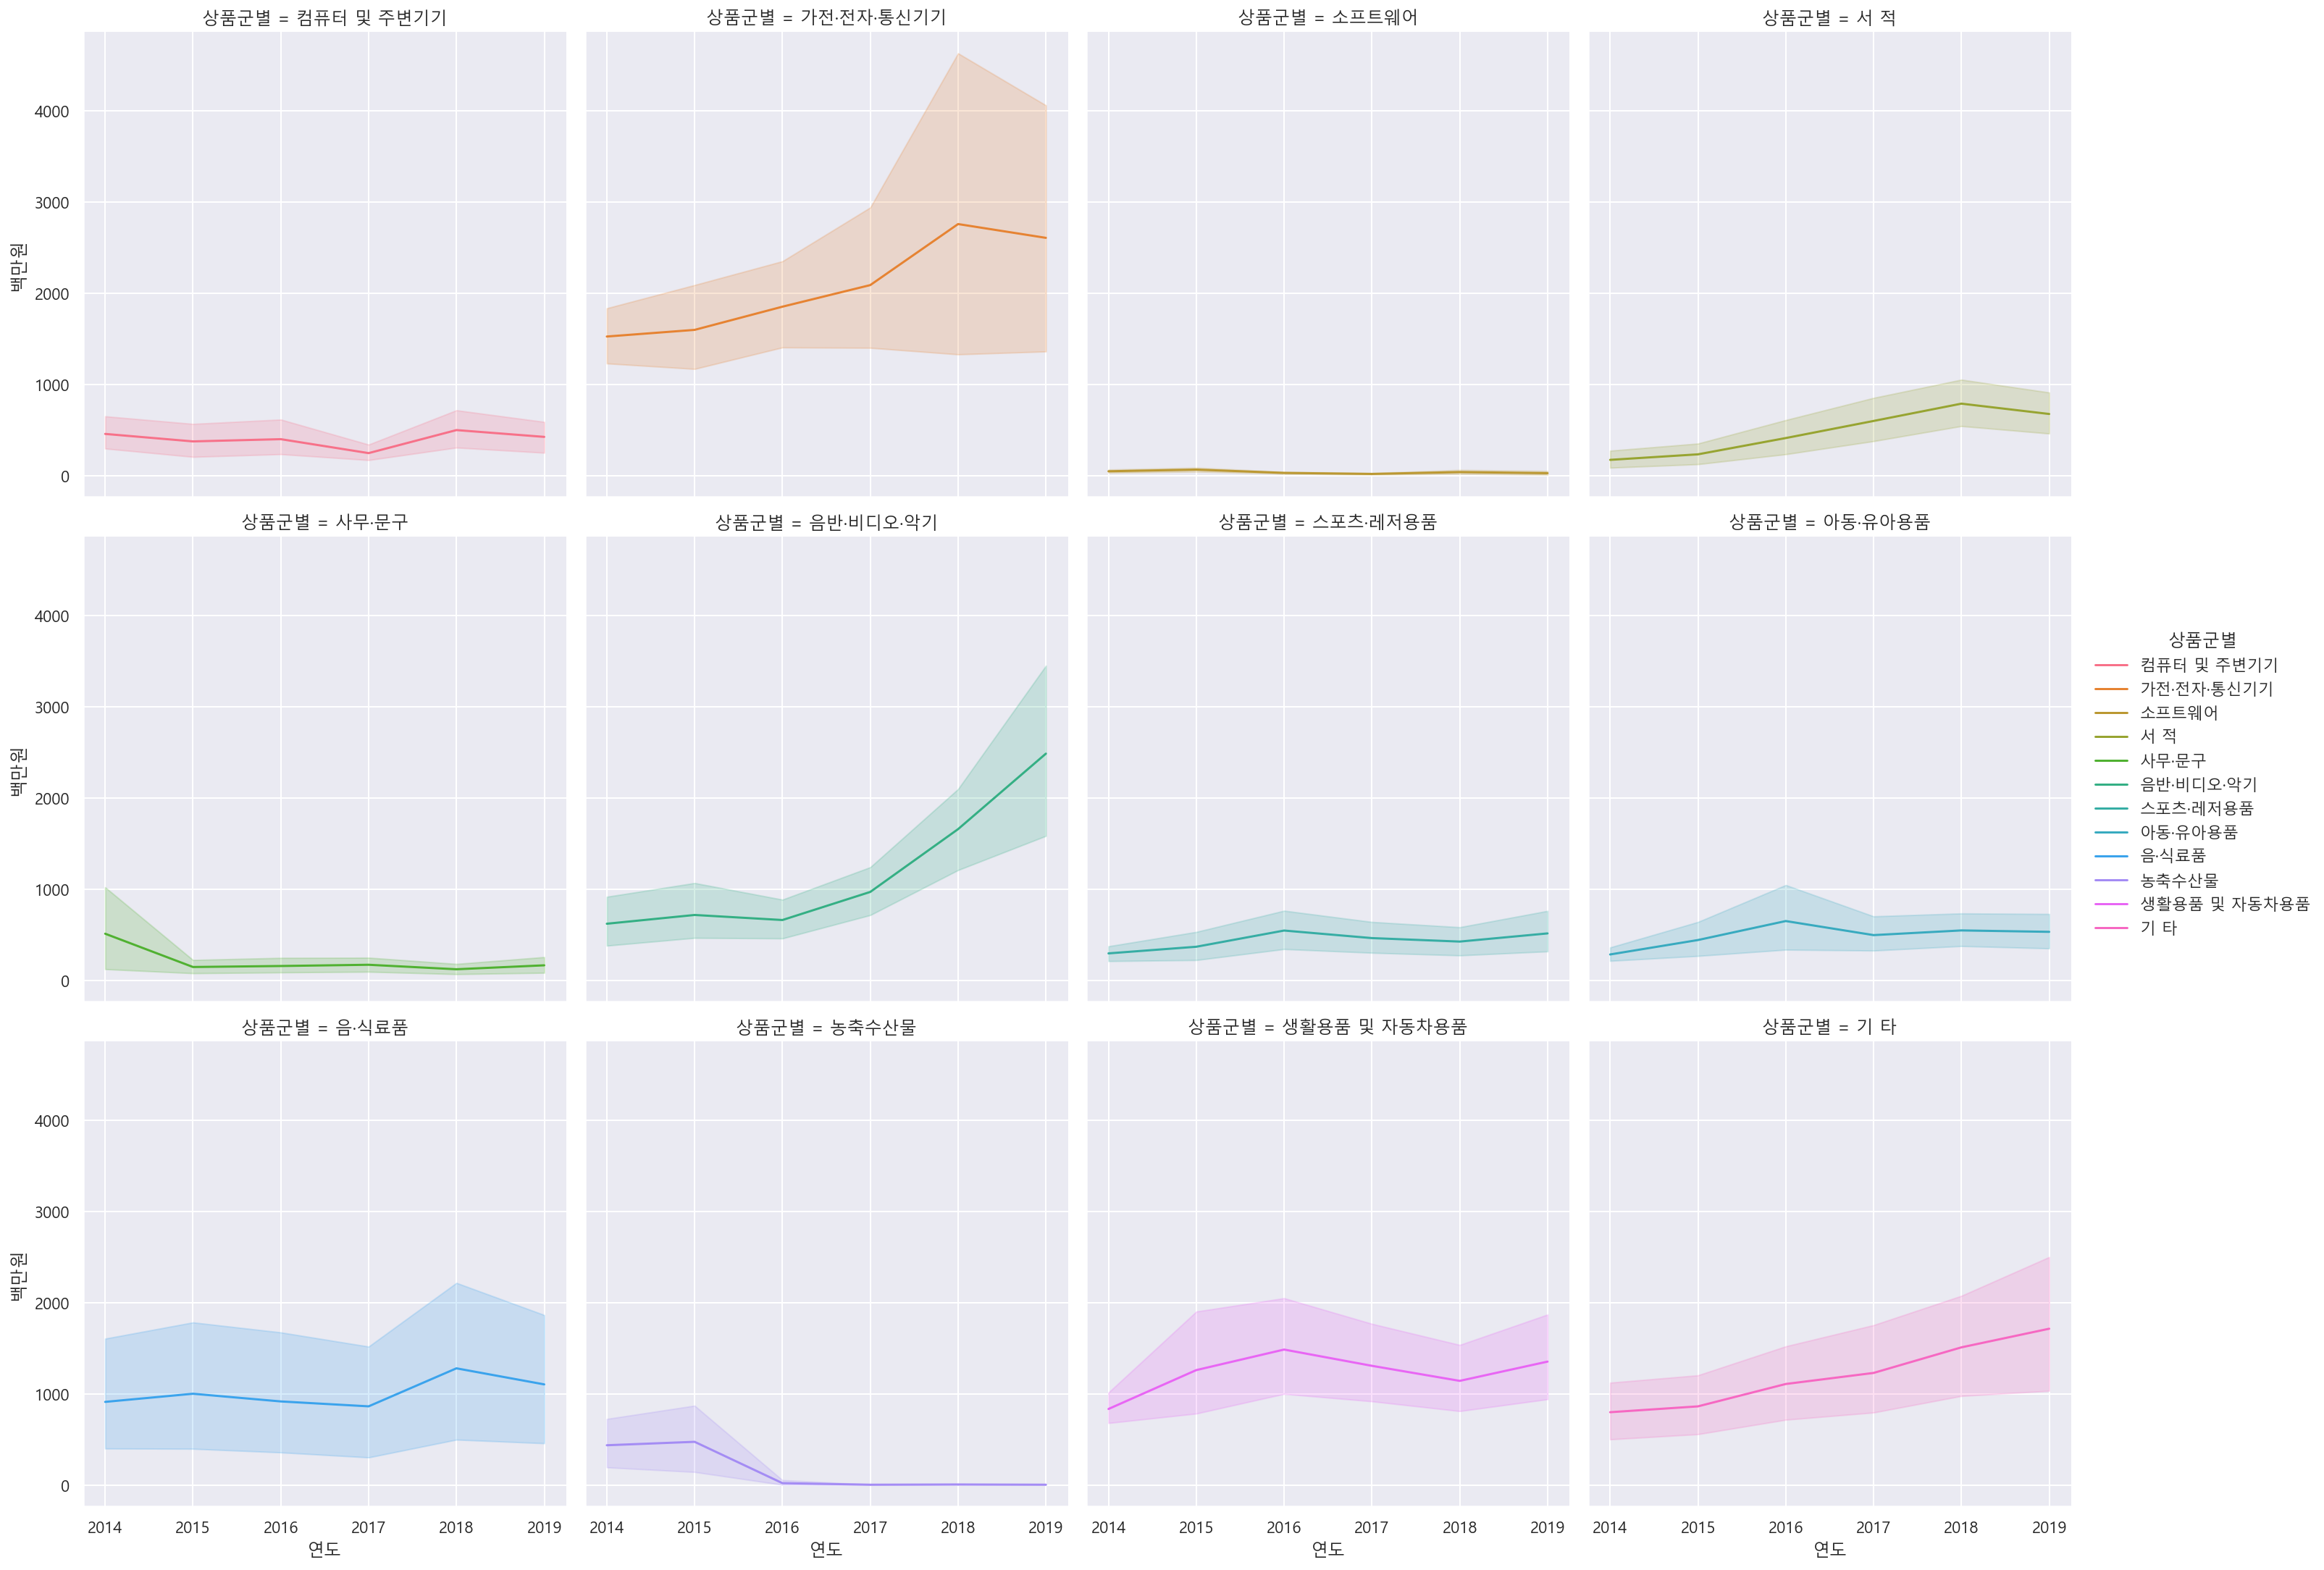

In [30]:
# 여전히 안보임 --> 의류 및 패션 관련상품" 도 제외하고 보자! 
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy() 
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",kind="line",col="상품군별",col_wrap=4)

## 화장품의 온라인쇼핑 해외직접 판매액 

In [33]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기 

df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

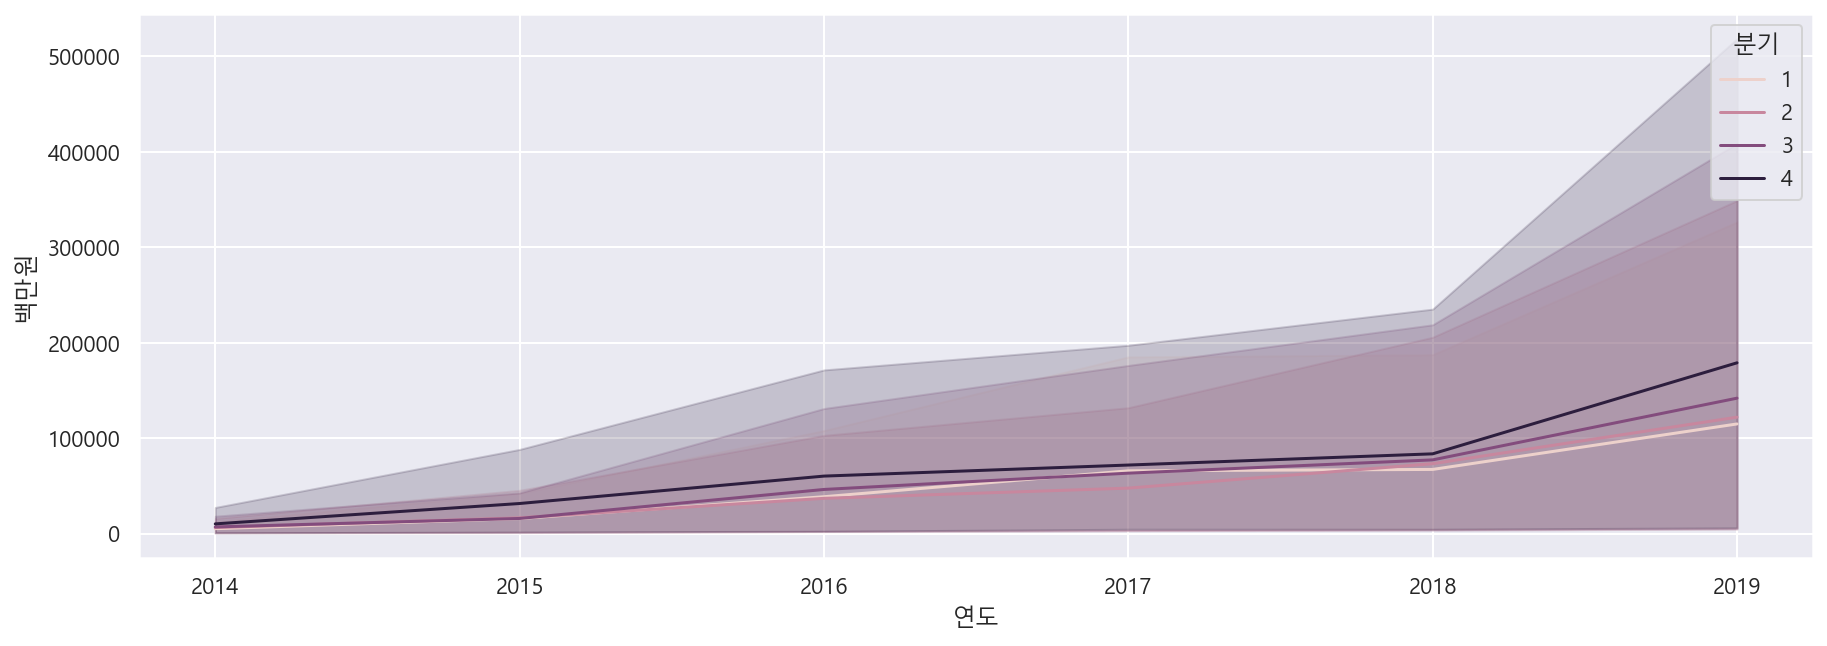

In [38]:
# 연도와 판매액을 lineplot으로 그리고, 분기별로 다른 색상으로 표기하기 
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cosmetic,x="연도",y="백만원",hue="분기")


<AxesSubplot:xlabel='기간', ylabel='백만원'>

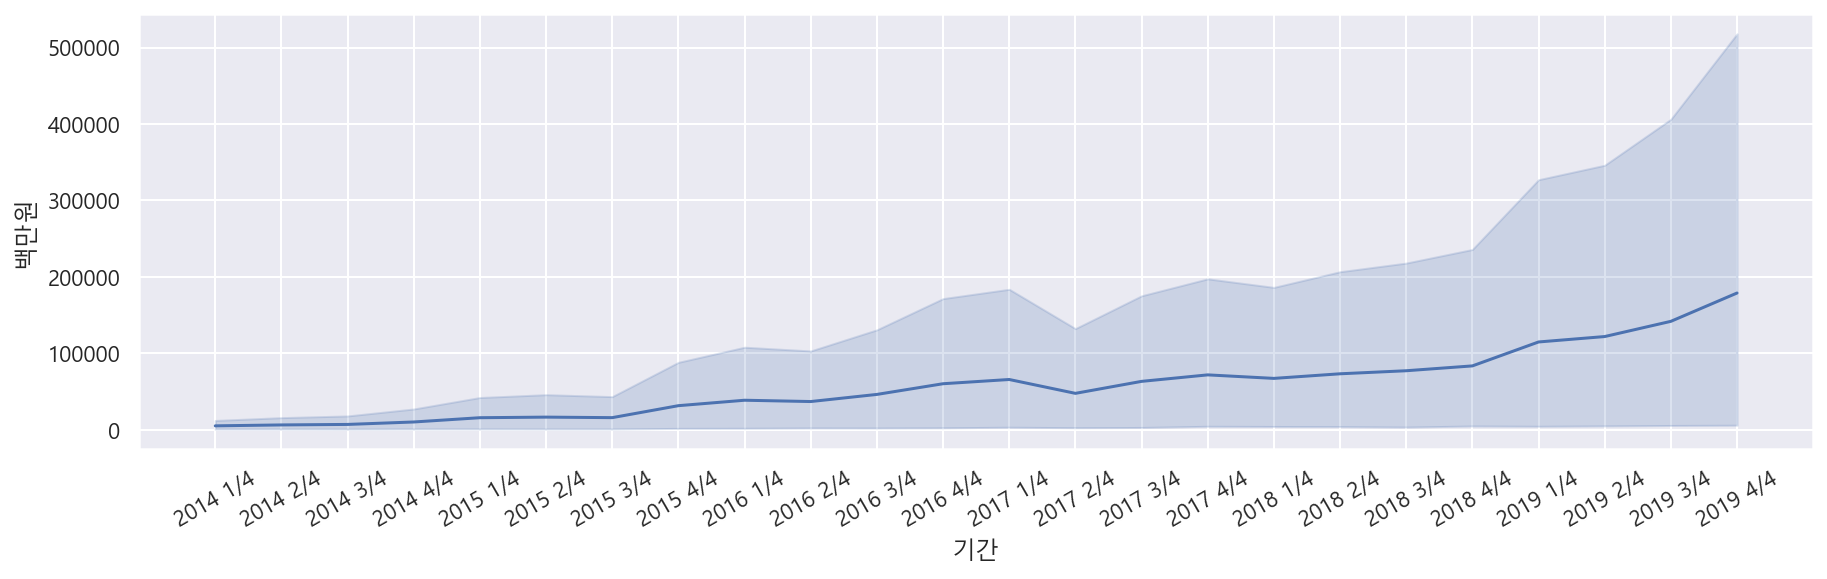

In [41]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x ="기간",y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

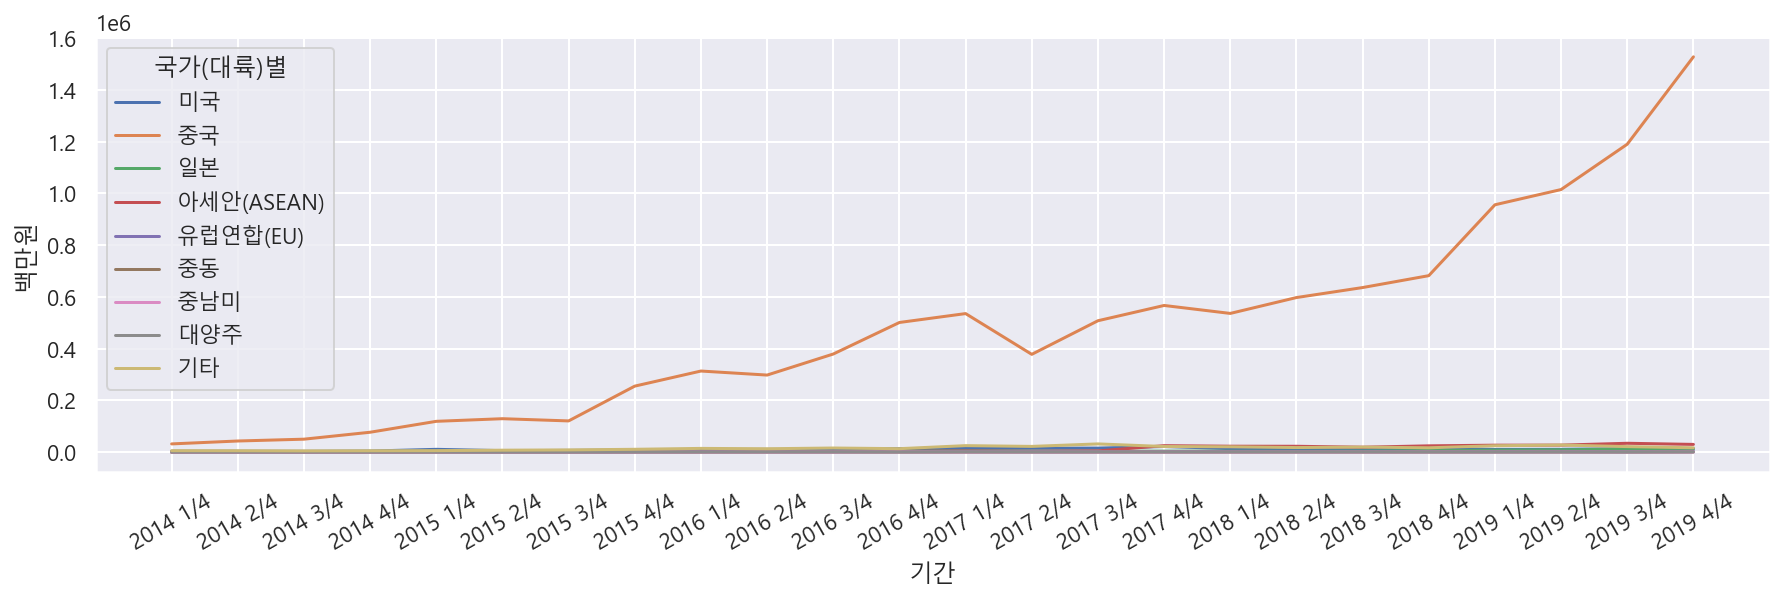

In [42]:
# 화장품 판매액에 대한 기간별 금액 데이터를 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x ="기간",y="백만원",hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

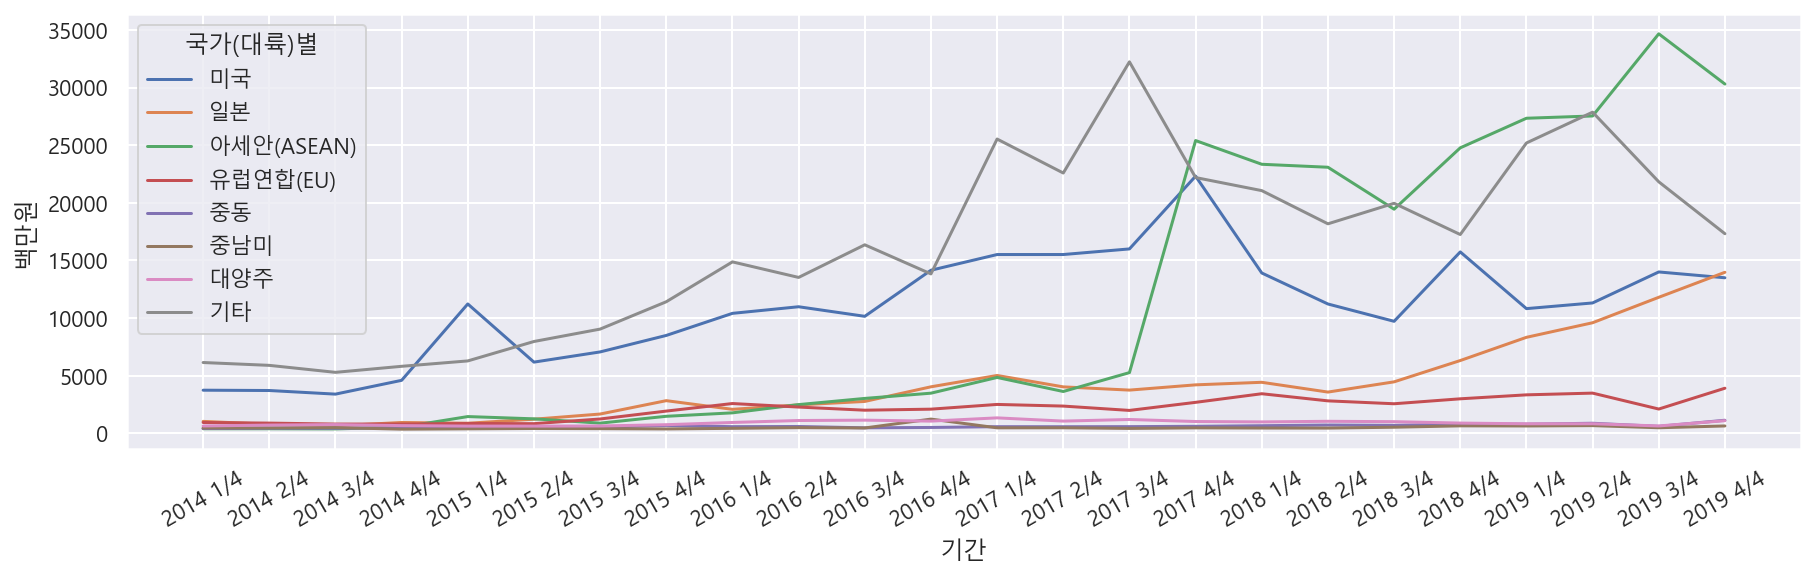

In [45]:
# 중국 개많이 사가네 --> 딴거 안보이잖아 ㅡㅡ 

# df_cosmetic_m_china = df_cosmetic[~df_cosmetic["국가(대륙)별"]=="중국"].copy()
df_cosmetic_m_china = df_cosmetic[~df_cosmetic["국가(대륙)별"].isin(["중국"])].copy()
# 문자열 연산에서는 == 보다는 isin([" "])을 사용해야하는듯! 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic_m_china,x="기간",y="백만원",hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

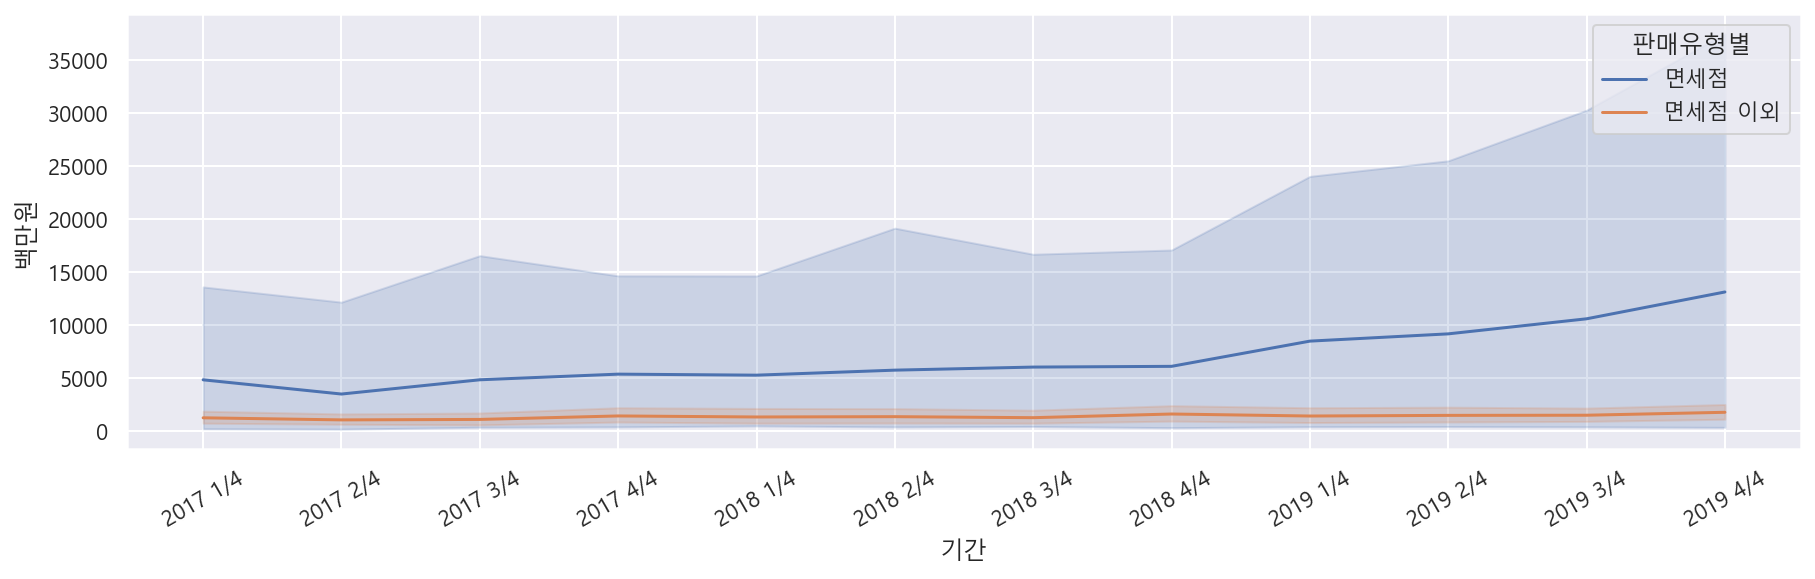

In [50]:
# 화장품 판매액에 대한 기간별 금액 데이터를 시각화하고 "판매유형별"로 다른 색상으로 표시하기
df[df["판매유형별"] != "계"].copy()
# 해당 데이터에는 2017년 이후부터의 값만이 존재한다. 
df_sub = df[df["판매유형별"] != "계"].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x= "기간",y="백만원",hue="판매유형별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

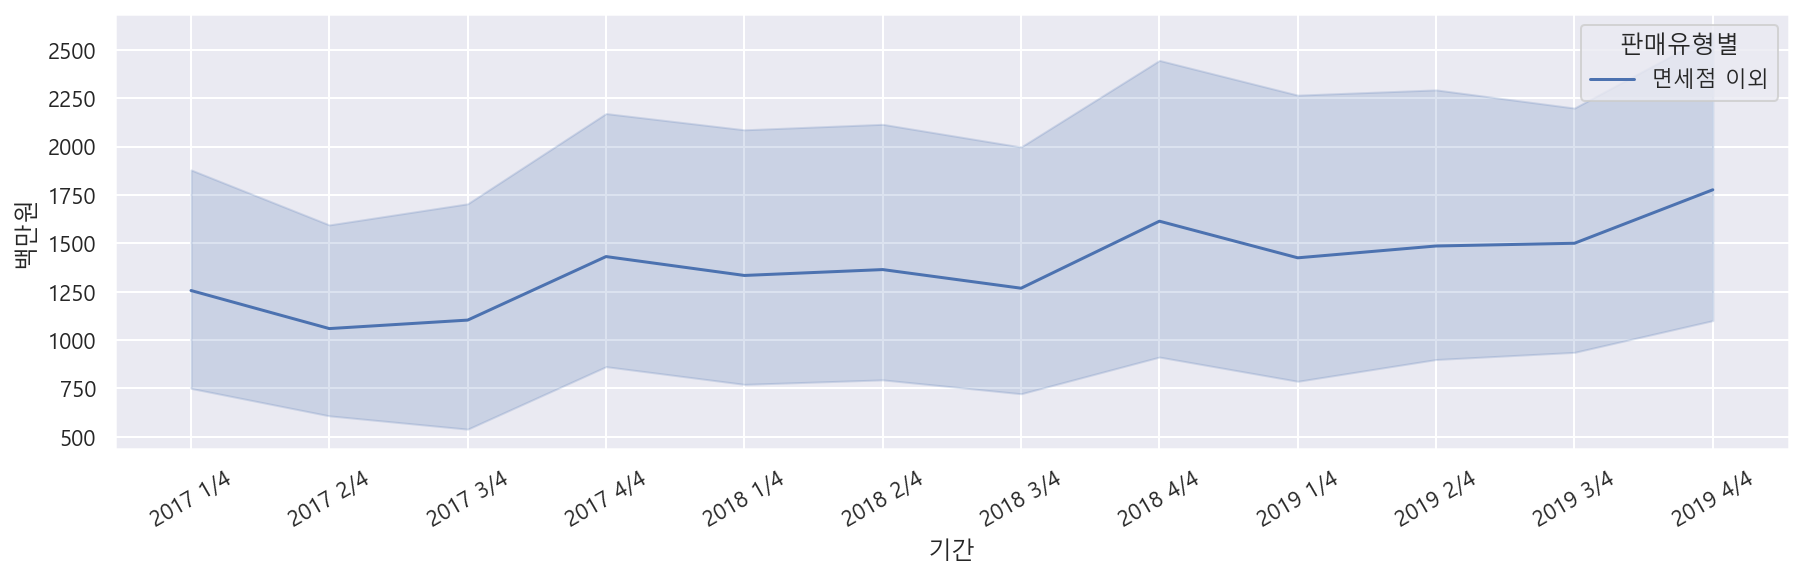

In [56]:
# 하;; 면세점이 방해하자나 
df_sub2 = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub2, x= "기간",y="백만원",hue="판매유형별")

## 의류 및 패션관련 상품 온라인쇼핑 해외 직접판매액

In [59]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기 

 #d f_fashion = df[df["상품군별"]=="의류 및 패션 관련상품"].copy()
 # df_fashion
# 2014년 이전이 데이터는 계 말고 면세점 및 면세점 데이터가 결측 
# 계만 따로 뽑아서 시각화 합니다. 
df_fashion = df[(df["상품군별"]=="의류 및 패션 관련상품") &(df["판매유형별"] == "계")].copy()
df_fashion


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,유럽연합(EU),의류 및 패션 관련상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션 관련상품,계,2019 4/4,242.0,2019,4
10686,중남미,의류 및 패션 관련상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션 관련상품,계,2019 4/4,626.0,2019,4


<AxesSubplot:xlabel='기간', ylabel='백만원'>

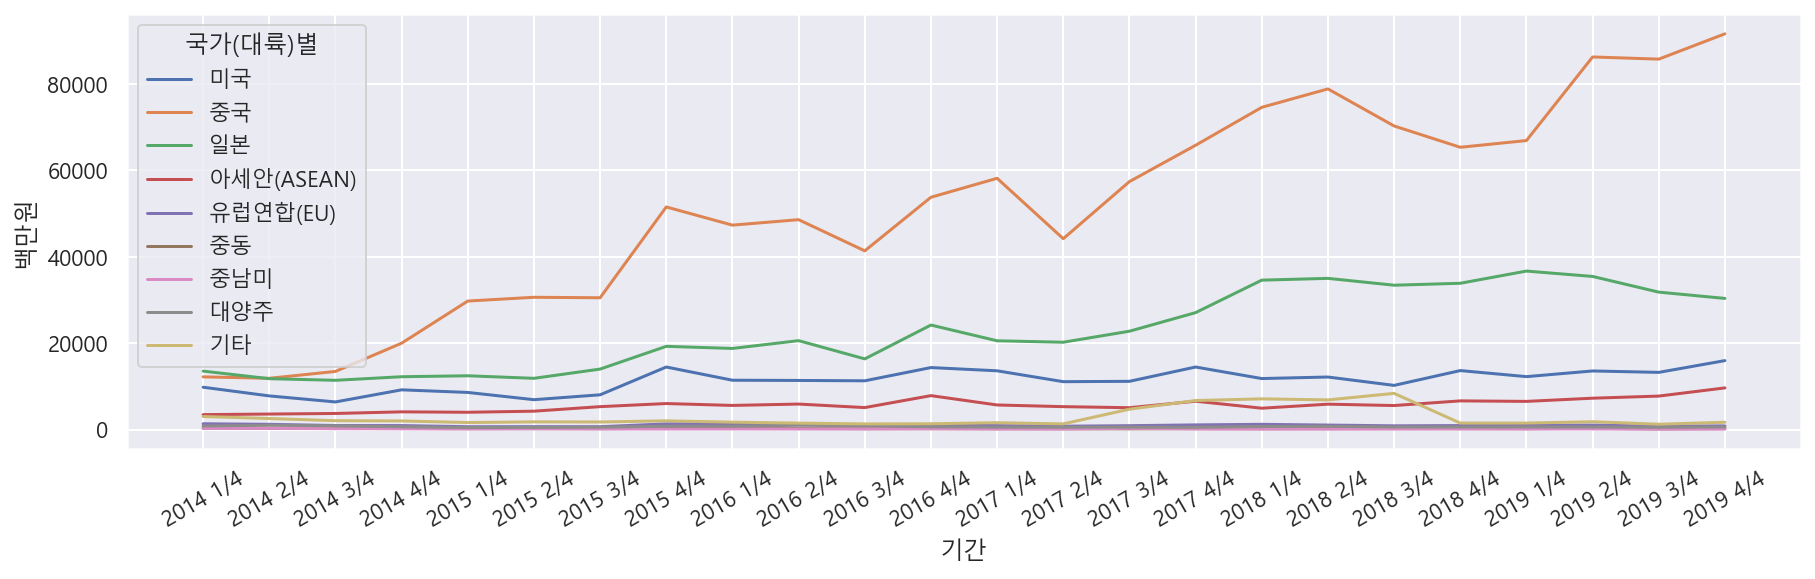

In [61]:
# 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터를 시각화하고 
# "국가(대륙)별"로 다른 색상을 지정해줍니다.

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간",y="백만원",hue="국가(대륙)별")

<ipython-input-62-6135da8f2c6f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df_fashion[df["국가(대륙)별"] != "중국"], x="기간",y="백만원",hue="국가(대륙)별")


<AxesSubplot:xlabel='기간', ylabel='백만원'>

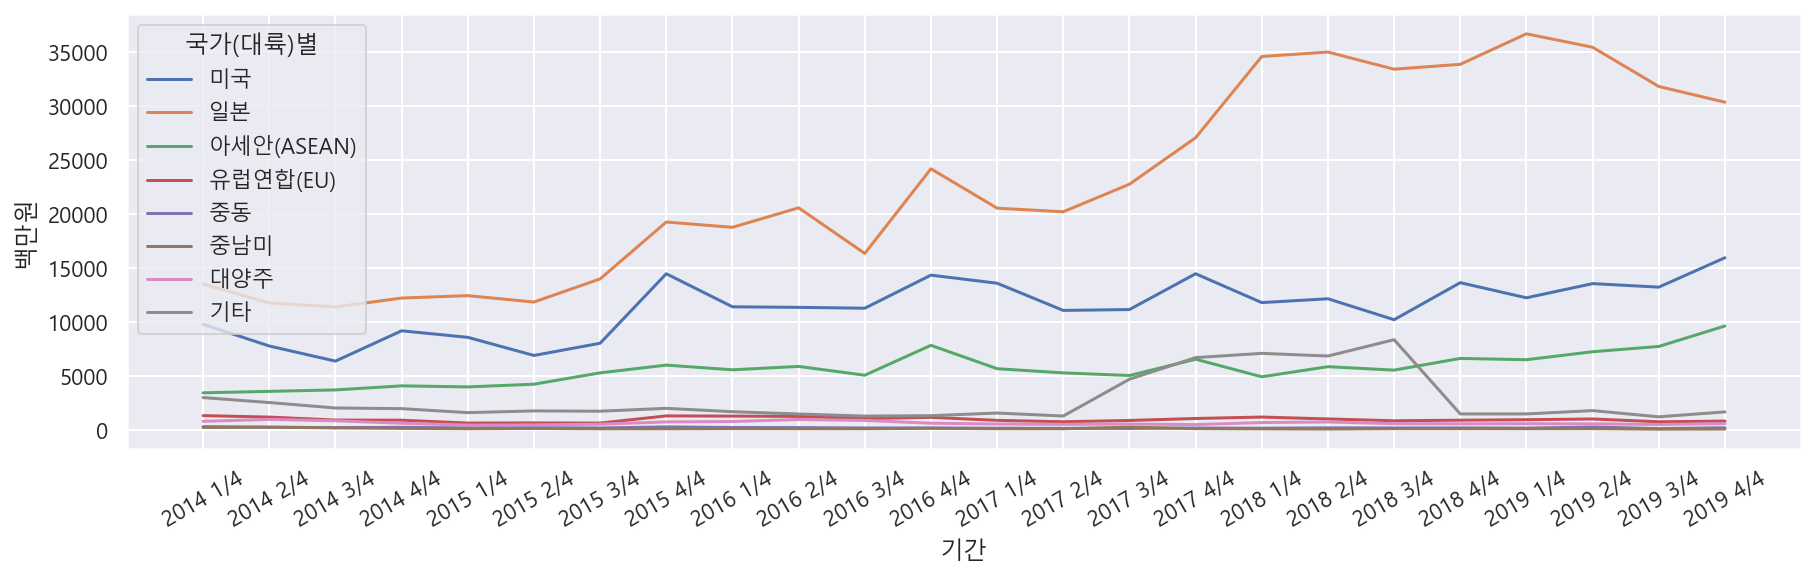

In [62]:
# 하..중국이 또 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion[df["국가(대륙)별"] != "중국"], x="기간",y="백만원",hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

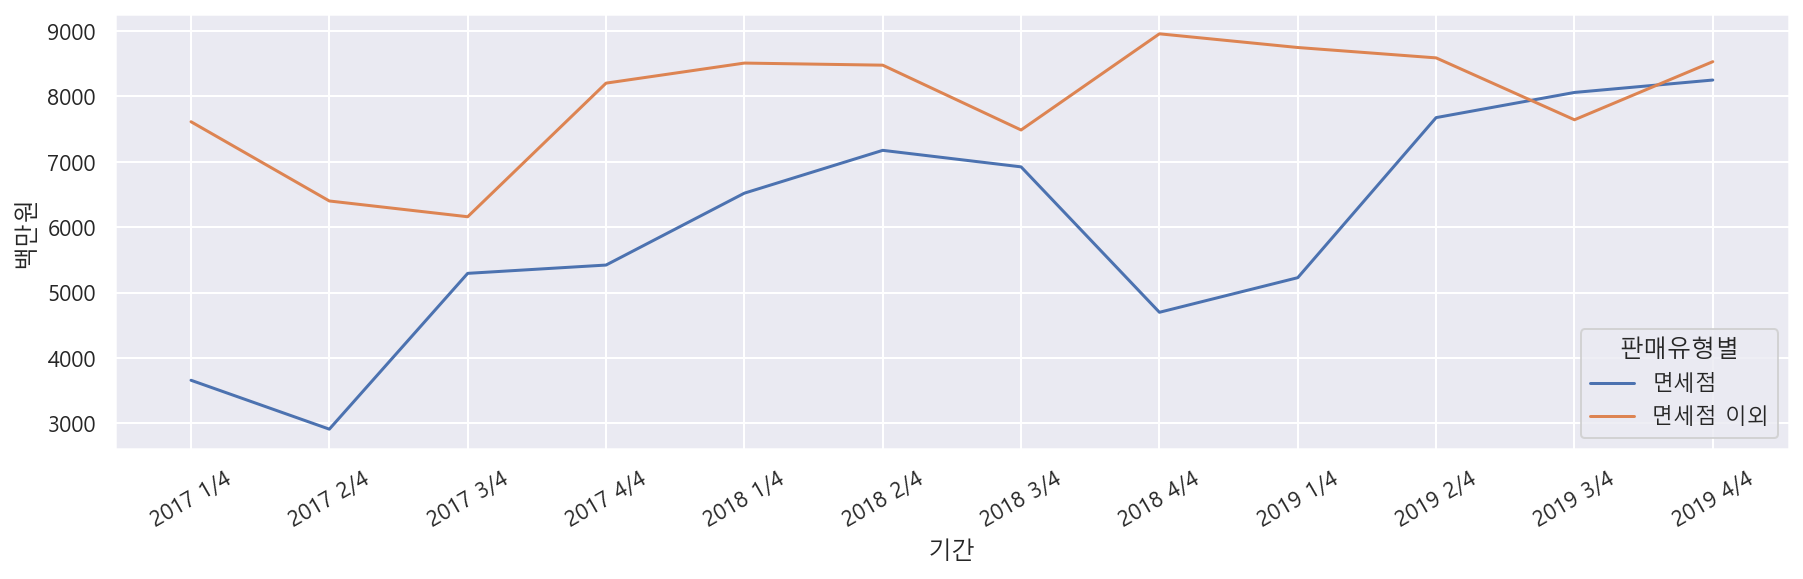

In [64]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터를 시각화하고 
# "판매유형별"로 다른 색상으로 표현하기 

df_fashion2 = df[(df["상품군별"]=="의류 및 패션 관련상품") &(df["판매유형별"] != "계")].copy()


plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간",y="백만원",hue="판매유형별", ci =None)
# 신뢰구간 옵션 제거 --> ci = None


## 데이터 집계하기

In [72]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,유럽연합(EU),의류 및 패션 관련상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션 관련상품,계,2019 4/4,242.0,2019,4
10686,중남미,의류 및 패션 관련상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션 관련상품,계,2019 4/4,626.0,2019,4


In [74]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [69]:
# 피봇테이블로 "국가(대륙)별" "연도"별로 합계 금액을 표 형태로 구하기 

#df_fashion.pivot_table?
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")

# 해당 결과는 aggregation function을 mean 으로 default 시켜놓은것! 

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,2420.75,1812.00,1479.50,3596.75,5975.25,1577.25
대양주,848.00,587.25,850.25,566.50,681.25,596.75
미국,8305.75,9516.50,12112.75,12588.25,11968.75,13758.75
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5767.00,7804.25
유럽연합(EU),1121.25,843.50,1224.75,934.00,1028.50,923.50
일본,12240.00,14398.50,19976.25,22646.00,34200.00,33560.75
중국,14382.75,35584.75,47733.00,56351.75,72212.00,82563.50
중남미,243.75,154.00,162.25,190.50,144.00,135.75
중동,293.00,254.50,242.00,193.00,219.75,231.00


In [78]:
# 각 수치를 분기별 평균이 아닌, 합계를 이용해 추산한다. 

result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", 
                       values="백만원",aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


## 연산결과를 시각적으로 보기 

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

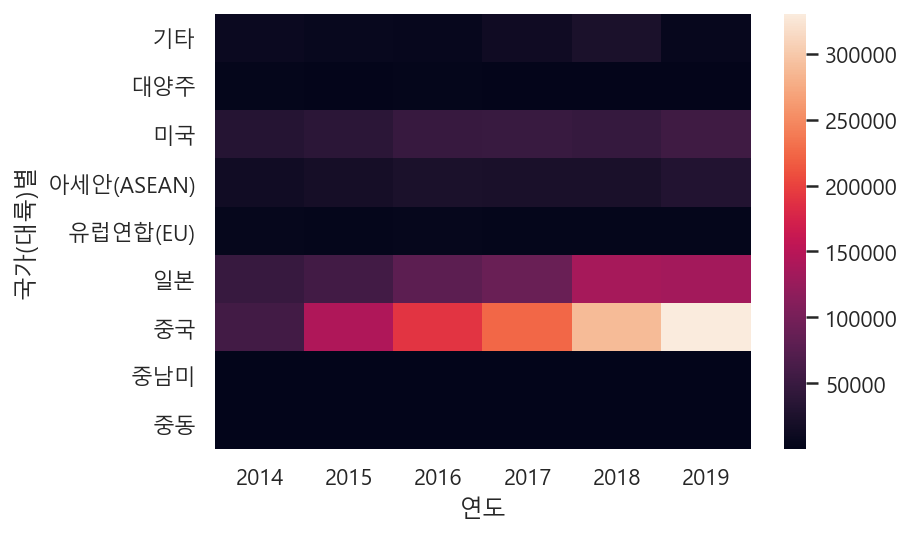

In [77]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기 

sns.heatmap(result)

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

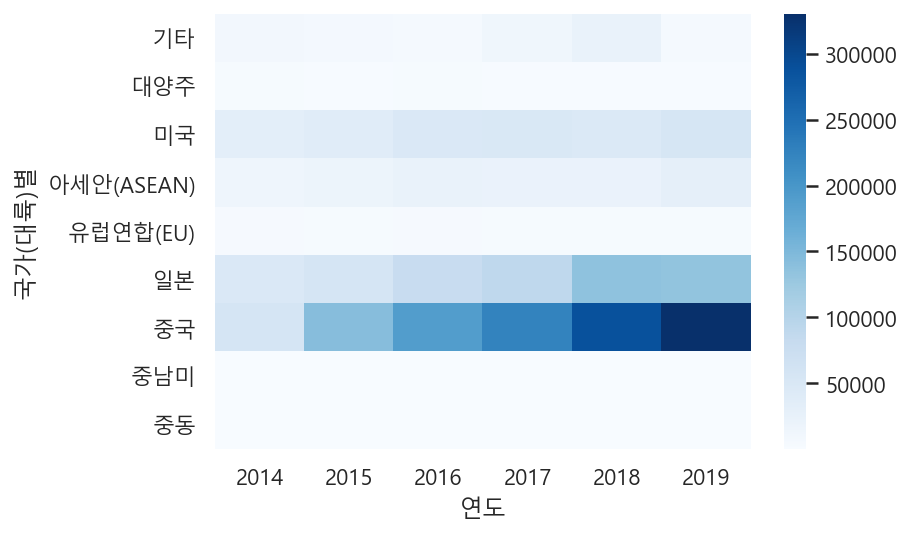

In [79]:
#  보기 편안하기 위한 옵션 추가 

sns.heatmap(result, cmap="Blues")

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

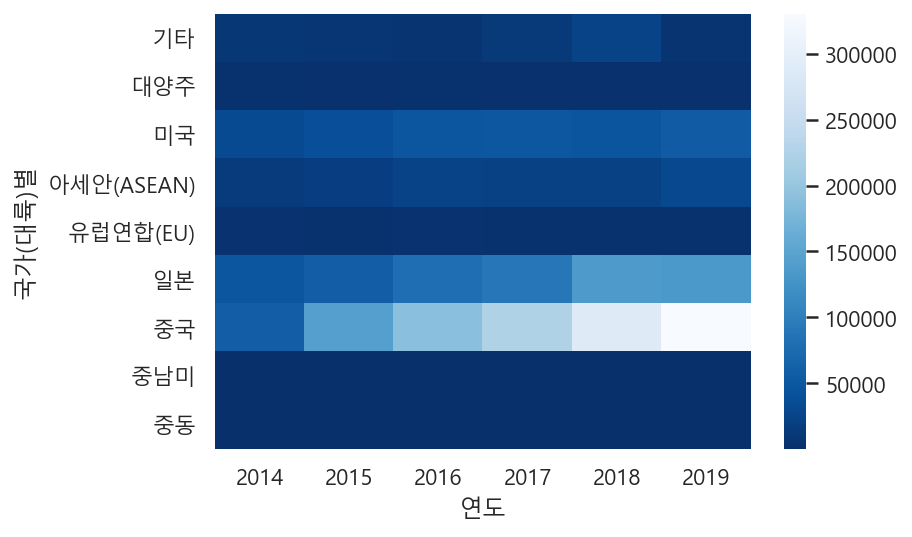

In [80]:
sns.heatmap(result, cmap="Blues_r") # 색의 명도 반전 

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

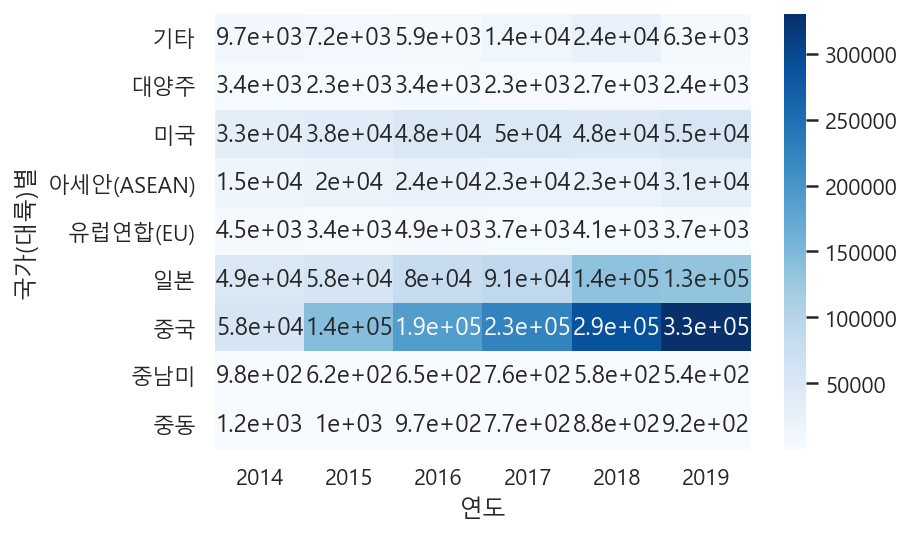

In [81]:
sns.heatmap(result, cmap="Blues",annot= True) # 숫자 포함

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

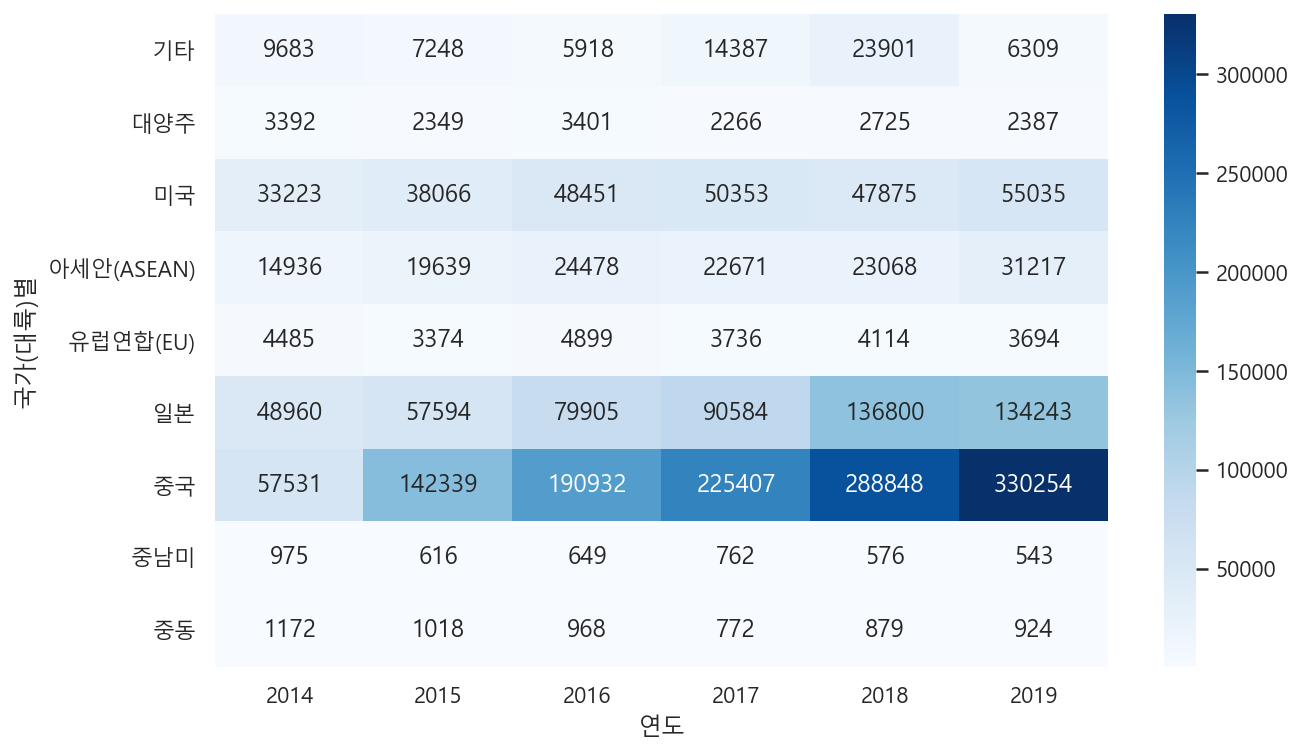

In [83]:
# 숫자 잘 안보임, 숫자 형태 포맷 
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

# 전체 상품군별로 온라인쇼핑 직접판매액은 증가했을까? 

<AxesSubplot:xlabel='연도', ylabel='백만원'>

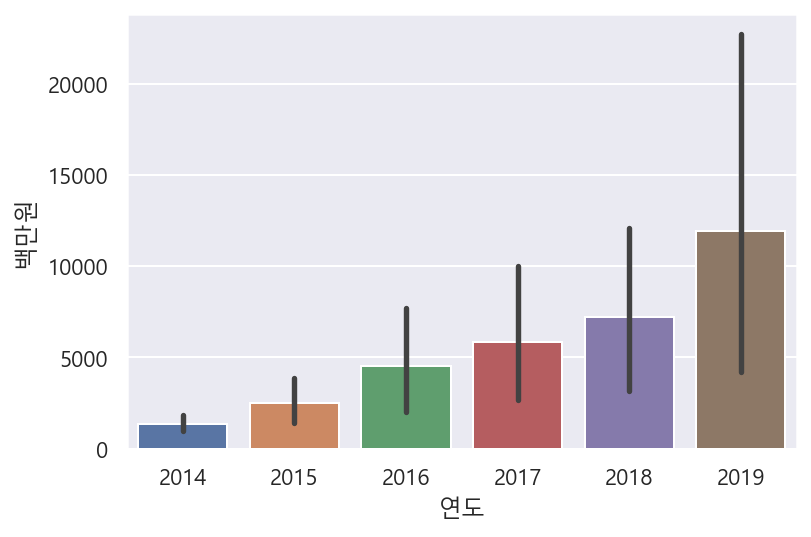

In [87]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 데이터 합계 금액을 시각화하기 

df_total 
sns.barplot(data=df_total, x="연도",y= "백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

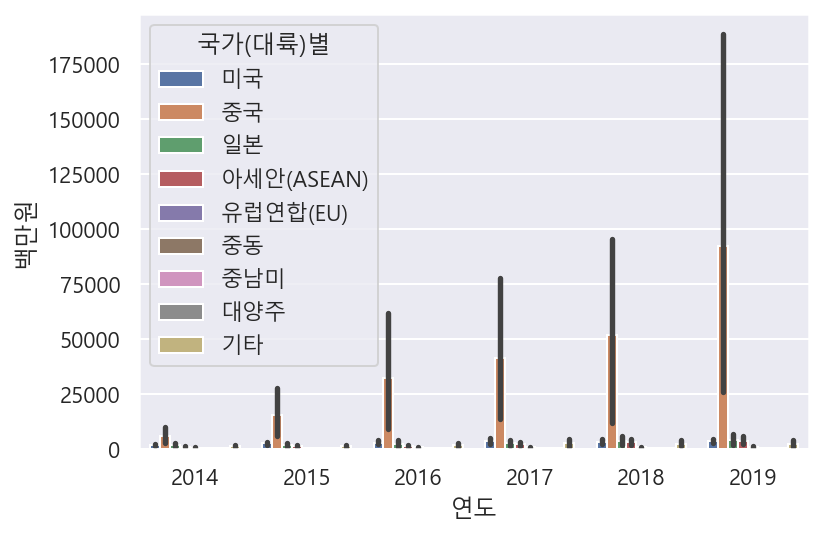

In [88]:
sns.barplot(data=df_total, x="연도",y= "백만원",hue="국가(대륙)별")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

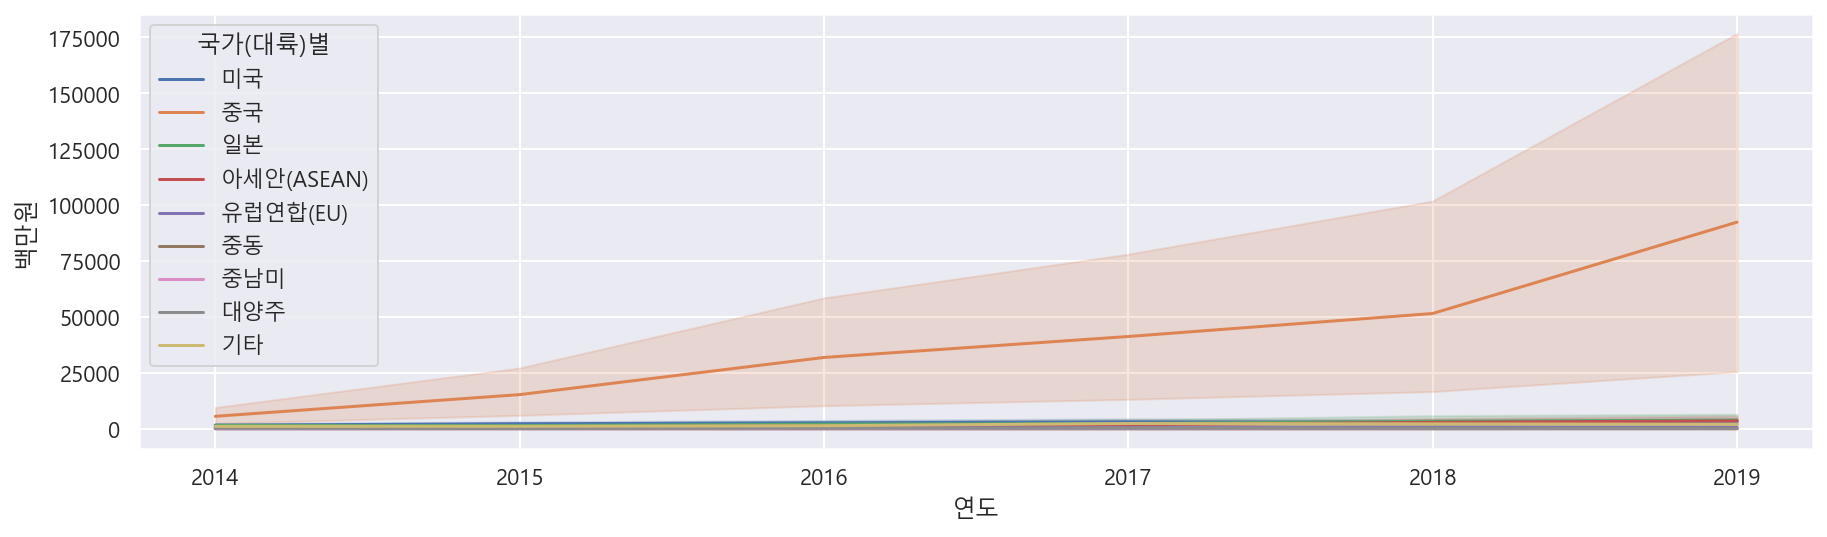

In [90]:
# 위에꺼 너무 보기 어려움 
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도",y= "백만원",hue="국가(대륙)별")

TypeError: 'bool' object is not callable

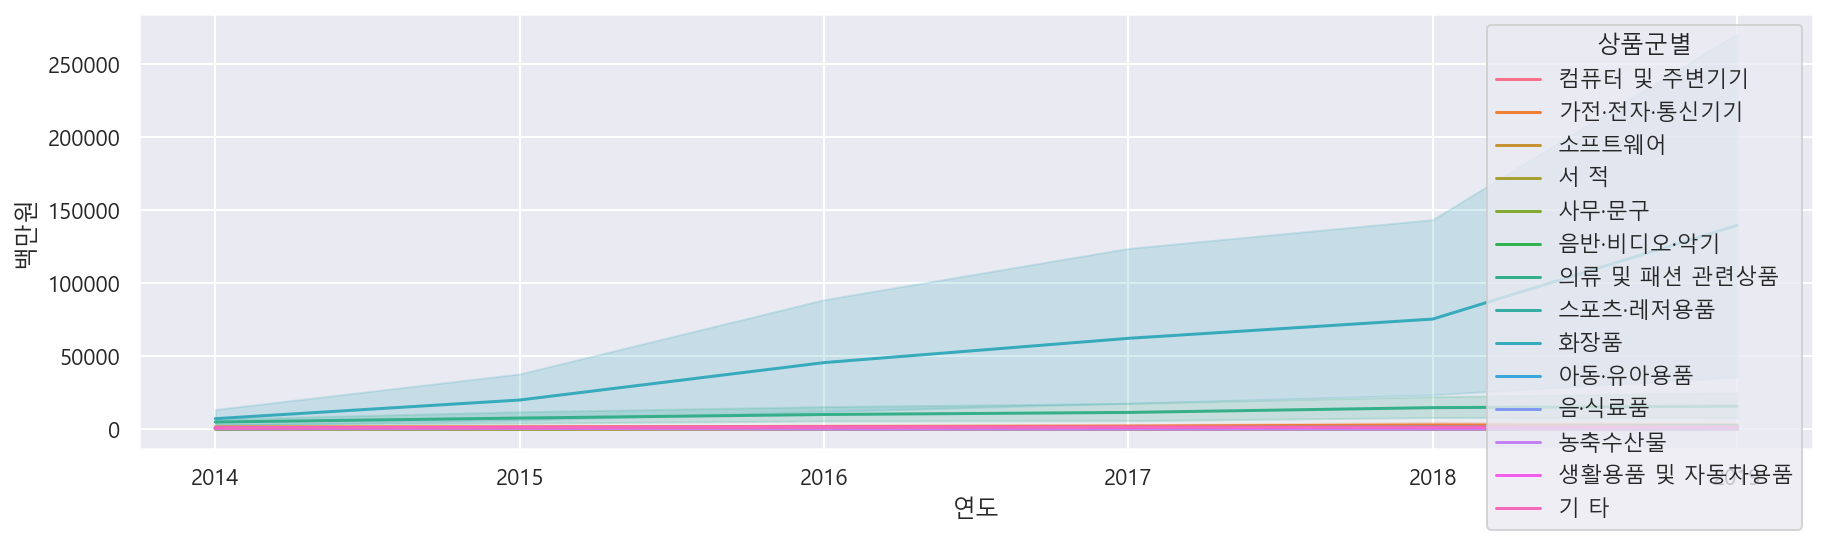

In [97]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_total, x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad =0.)